# Exploratory Data Analysis (EDA) - Benin (Malanville) Solar Data
#
# **Objective:** Profile, clean, and explore Benin's (Malanville) solar dataset to understand its characteristics, identify trends, and extract insights for potential solar investments.
#
# **Business Objective Context:** MoonLight Energy Solutions aims to enhance operational efficiency and sustainability through targeted solar investments. This EDA will help identify high-potential regions by analyzing environmental measurement data.

## 1. Setup and Data Loading

In [3]:
#  1. Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os # For creating directory if it doesn't exist

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid') # A modern seaborn style
sns.set_palette("viridis") # A nice color palette


In [4]:
DATA_DIR = '../data/'
FILE_NAME = 'benin-malanville.csv' 
data_path = os.path.join(DATA_DIR, FILE_NAME)

CLEANED_DATA_DIR = '../data/' 
if not os.path.exists(CLEANED_DATA_DIR):
    os.makedirs(CLEANED_DATA_DIR)
cleaned_file_path = os.path.join(CLEANED_DATA_DIR, 'benin-malanville_clean.csv') # <<< Adjusted cleaned file name

In [5]:
try:
    df_benin = pd.read_csv(data_path)
    print(f"Successfully loaded {data_path}")
except FileNotFoundError:
    print(f"Error: {data_path} not found. Ensure the file is in the '{DATA_DIR}' directory.")
    df_benin = None # Set to None if file not found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df_benin = None

Successfully loaded ../data/benin-malanville.csv


 ## 2. Initial Data Inspection

In [6]:
if df_benin is not None:
    print("--- First 5 Rows ---")
    display(df_benin.head())

    print("\n--- Last 5 Rows ---")
    display(df_benin.tail())

    print("\n--- Data Info ---")
    df_benin.info()

    print(f"\n--- Data Shape ---")
    print(f"Rows: {df_benin.shape[0]}, Columns: {df_benin.shape[1]}")

    print("\n--- Data Types ---")
    display(df_benin.dtypes)
else:
    print("DataFrame not loaded. Skipping initial inspection.")

--- First 5 Rows ---


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN


--- Last 5 Rows ---


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

 ## 2.1. Timestamp Conversion
 The 'Timestamp' column needs to be converted to datetime objects for time series analysis.

In [7]:
if df_benin is not None:
    if 'Timestamp' in df_benin.columns:
        try:
            # Attempt to infer format, or specify if known e.g., format='%Y-%m-%d %H:%M:%S'
            df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])
            print("Timestamp column successfully converted to datetime.")
            display(df_benin[['Timestamp']].head(2))
            display(df_benin[['Timestamp']].dtypes)
        except Exception as e:
            print(f"Error converting Timestamp column: {e}")
            print("Please check the format of your Timestamp column.")
    else:
        print("Error: 'Timestamp' column not found.")
else:
    print("DataFrame not loaded. Skipping timestamp conversion.")

Timestamp column successfully converted to datetime.


Timestamp
0 2021-08-09 00:01:00
1 2021-08-09 00:02:00

Timestamp    datetime64[ns]
dtype: object

## 3. Summary Statistics & Missing Value Report

In [8]:
if df_benin is not None:
    print("--- Summary Statistics (Numeric Columns) ---")
    numeric_cols = df_benin.select_dtypes(include=np.number).columns
    if not numeric_cols.empty:
        display(df_benin[numeric_cols].describe().T) # Transpose for better readability
    else:
        print("No numeric columns found for summary statistics.")

    print("\n--- Missing Value Report (Counts & Percentage) ---")
    missing_report = df_benin.isna().sum()
    missing_percentage = (missing_report / len(df_benin)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_report, 'Missing Percentage': missing_percentage})
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    if not missing_df.empty:
        display(missing_df)
    else:
        print("No missing values found.")

    print("\n--- Columns with >5% Missing Values ---")
    high_missing_cols = missing_df[missing_df['Missing Percentage'] > 5]
    if not high_missing_cols.empty:
        display(high_missing_cols)
    else:
        print("No columns with >5% missing values.")
else:
    print("DataFrame not loaded. Skipping summary statistics and missing values.")

--- Summary Statistics (Numeric Columns) ---


count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0.0    3.7    8.6   12.3   
BP             525600.0  994.197199    2.474993  985.0  993.0  994.0  996.0   
Cleaning       525600.0    0.000923    0.030363    0.0    0.0    0.0    0.0   
Precipitation  525600.0    0.001905    0.037115    0.0    0.0    0.0    0.0   
TModA          525600.0   35.246026   14.807258    9.0   24.2   30.0   46.9   
TModB          525600.0   32.471736   12.348743    8.1   23.6   28.9   41.5   
Comments            0.0         NaN         NaN    NaN    NaN    NaN    NaN   

                  max  
GHI            1413.0  
DNI             952.3  
DHI             759.2  
ModA           1342.3  
ModB           1342.3  
Tamb             43.8  
RH              100.0  
WS               19.5  
WSgust           26.6  
WSstdev           4.2  
WD              360.0  
WDstdev          99.4  
BP             1003.0  
Cleaning          1.0  
Precipitation     2.5  
TModA            81.0  
TModB            72.5  
Comments          NaN


--- Missing Value Report (Counts & Percentage) ---


Missing Count  Missing Percentage
Comments         525600               100.0


--- Columns with >5% Missing Values ---


Missing Count  Missing Percentage
Comments         525600               100.0

## 3.1 Handling Missing Values

In [9]:
if df_benin is not None:
    df_cleaned = df_benin.copy() # Work on a copy for cleaning

    # Handle 'Comments' column
    if 'Comments' in df_cleaned.columns:
        # Check if it's mostly NaNs or empty strings
        comments_nan_or_empty = df_cleaned['Comments'].isna().sum() + (df_cleaned['Comments'] == '').sum()
        if comments_nan_or_empty / len(df_cleaned) > 0.9: # If > 90% empty/NaN
            print("Dropping 'Comments' column as it is mostly empty/NaN.")
            df_cleaned.drop('Comments', axis=1, inplace=True)
        else:
            print("Keeping 'Comments' column. Unique values (sample):")
            # display(df_cleaned['Comments'].value_counts(dropna=False).head()) # Shows counts of unique comments

    # Imputation strategy for numeric columns
    # Identify numeric columns from the original list, excluding those already handled or non-numeric
    potential_numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
                              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 
                              'Precipitation', 'TModA', 'TModB']
    
    cols_to_impute_median = [col for col in potential_numeric_cols if col in df_cleaned.columns and df_cleaned[col].isna().any()]

    print("\n--- Imputing Missing Values (Median) ---")
    for col in cols_to_impute_median:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]): # Ensure column is numeric before median
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in '{col}' with median ({median_val:.2f}).")
        else:
            print(f"Column '{col}' is not numeric, skipping median imputation.")

    # For 'Cleaning' column, if missing, impute with mode (likely 0 if it's rare)
    if 'Cleaning' in df_cleaned.columns and df_cleaned['Cleaning'].isna().any():
        mode_cleaning = df_cleaned['Cleaning'].mode()[0]
        df_cleaned['Cleaning'].fillna(mode_cleaning, inplace=True)
        print(f"Imputed missing values in 'Cleaning' with mode ({mode_cleaning}).")


    print("\n--- Missing Values After Imputation ---")
    remaining_missing = df_cleaned.isna().sum()
    display(remaining_missing[remaining_missing > 0])
    if remaining_missing.sum() == 0:
        print("All identified missing values handled.")
else:
    print("DataFrame not loaded. Skipping missing value handling.")

Dropping 'Comments' column as it is mostly empty/NaN.

--- Imputing Missing Values (Median) ---

--- Missing Values After Imputation ---


Series([], dtype: int64)

All identified missing values handled.


## 4. Outlier Detection & Basic Cleaning

 ### 4.1. Z-score for Outlier Detection
compute Z-scores for key sensor readings and wind speed data. Rows with an absolute Z-score > 3 will be flagged as potential outliers.

In [10]:
if 'df_cleaned' in locals() and df_cleaned is not None:
    cols_for_zscore = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    outlier_info = {} # To store counts of outliers

    print("--- Outlier Detection (Z-score > 3) ---")
    for col in cols_for_zscore:
        if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]):
            # Ensure no NaNs before zscore (should be handled by imputation)
            if df_cleaned[col].isna().any():
                print(f"Warning: Column '{col}' still contains NaNs before Z-score calculation. This might indicate an issue in imputation.")

            col_zscore = zscore(df_cleaned[col])
            df_cleaned[f'{col}_zscore'] = col_zscore # Store z-score for inspection if needed
            
            # Flag outliers
            is_outlier = np.abs(col_zscore) > 3
            outlier_info[col] = is_outlier.sum()
            
            if is_outlier.any():
                print(f"Potential outliers found in '{col}': {is_outlier.sum()} instances.")
            else:
                print(f"No outliers (Z-score > 3) found in '{col}'.")
        else:
            print(f"Column '{col}' not found or not numeric. Skipping Z-score calculation.")
else:
    print("Cleaned DataFrame not available. Skipping outlier detection.")


--- Outlier Detection (Z-score > 3) ---
Potential outliers found in 'GHI': 89 instances.
No outliers (Z-score > 3) found in 'DNI'.
Potential outliers found in 'DHI': 3738 instances.
Potential outliers found in 'ModA': 27 instances.
Potential outliers found in 'ModB': 63 instances.
Potential outliers found in 'WS': 3109 instances.
Potential outliers found in 'WSgust': 3500 instances.


## 4.2 Handling Outliers

In [11]:
if 'df_cleaned' in locals() and df_cleaned is not None:
    print("\n--- Applying Basic Physical Constraint Cleaning ---")
    
    # Solar Irradiance constraints
    for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
        if col in df_cleaned.columns:
            original_negative_count = (df_cleaned[col] < 0).sum()
            original_high_count = (df_cleaned[col] > 1500).sum() # Example upper bound
            
            df_cleaned[col] = df_cleaned[col].clip(lower=0, upper=1500) # Clip to 0 and a reasonable max
            
            if original_negative_count > 0:
                print(f"Clipped {original_negative_count} negative values in '{col}' to 0.")
            if original_high_count > 0:
                print(f"Clipped {original_high_count} values > 1500 in '{col}' to 1500.")

    # Wind speed constraint
    if 'WS' in df_cleaned.columns and 'WSgust' in df_cleaned.columns:
        inconsistent_ws_mask = df_cleaned['WSgust'] < df_cleaned['WS']
        if inconsistent_ws_mask.any():
            print(f"Correcting {inconsistent_ws_mask.sum()} instances where WSgust < WS by setting WSgust = WS.")
            df_cleaned.loc[inconsistent_ws_mask, 'WSgust'] = df_cleaned.loc[inconsistent_ws_mask, 'WS']
            
    # Relative Humidity constraint
    if 'RH' in df_cleaned.columns:
        original_rh_out_of_bounds = ((df_cleaned['RH'] < 0) | (df_cleaned['RH'] > 100)).sum()
        if original_rh_out_of_bounds > 0:
            df_cleaned['RH'] = df_cleaned['RH'].clip(lower=0, upper=100)
            print(f"Clipped {original_rh_out_of_bounds} RH values to be within [0, 100] range.")
            
    # Precipitation constraint (should be non-negative)
    if 'Precipitation' in df_cleaned.columns:
        original_precip_negative = (df_cleaned['Precipitation'] < 0).sum()
        if original_precip_negative > 0:
            df_cleaned['Precipitation'] = df_cleaned['Precipitation'].clip(lower=0)
            print(f"Clipped {original_precip_negative} negative Precipitation values to 0.")

else:
    print("Cleaned DataFrame not available. Skipping constraint cleaning.")


--- Applying Basic Physical Constraint Cleaning ---
Clipped 258847 negative values in 'GHI' to 0.
Clipped 275987 negative values in 'DNI' to 0.
Clipped 259182 negative values in 'DHI' to 0.


## 5. Export Cleaned Data

In [12]:
if 'df_cleaned' in locals() and df_cleaned is not None:
    try:
        # Drop Z-score columns before saving, as they were for diagnostics
        z_score_cols_to_drop = [col for col in df_cleaned.columns if '_zscore' in col]
        df_to_export = df_cleaned.drop(columns=z_score_cols_to_drop, errors='ignore')
        
        df_to_export.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned data exported to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error exporting cleaned data: {e}")
else:
    print("Cleaned DataFrame ('df_cleaned') not available. Skipping export.")

Cleaned data exported to: ../data/benin-malanville_clean.csv


## 6. Explanatory Data Analysis (EDA)
 Using the `df_cleaned` DataFrame. We'll set 'Timestamp' as the index for time series plots.

In [13]:
if 'df_cleaned' in locals() and df_cleaned is not None and 'Timestamp' in df_cleaned.columns:
    if pd.api.types.is_datetime64_any_dtype(df_cleaned['Timestamp']):
        df_plot = df_cleaned.set_index('Timestamp').copy()
        print("Set 'Timestamp' as index for plotting.")
    else:
        print("Warning: 'Timestamp' column is not datetime. Time series plots might not work as expected.")
        df_plot = df_cleaned.copy() # Fallback
elif 'df_cleaned' in locals() and df_cleaned is not None:
    print("Warning: 'Timestamp' column not found in df_cleaned. Time series plots will be limited.")
    df_plot = df_cleaned.copy()
else:
    print("Cleaned DataFrame ('df_cleaned') not available. Skipping EDA setup.")
    df_plot = None

Set 'Timestamp' as index for plotting.


### 6.1. Time Series Analysis
Line charts of GHI, DNI, DHI, Tamb vs. Timestamp.

--- Time Series Plots ---


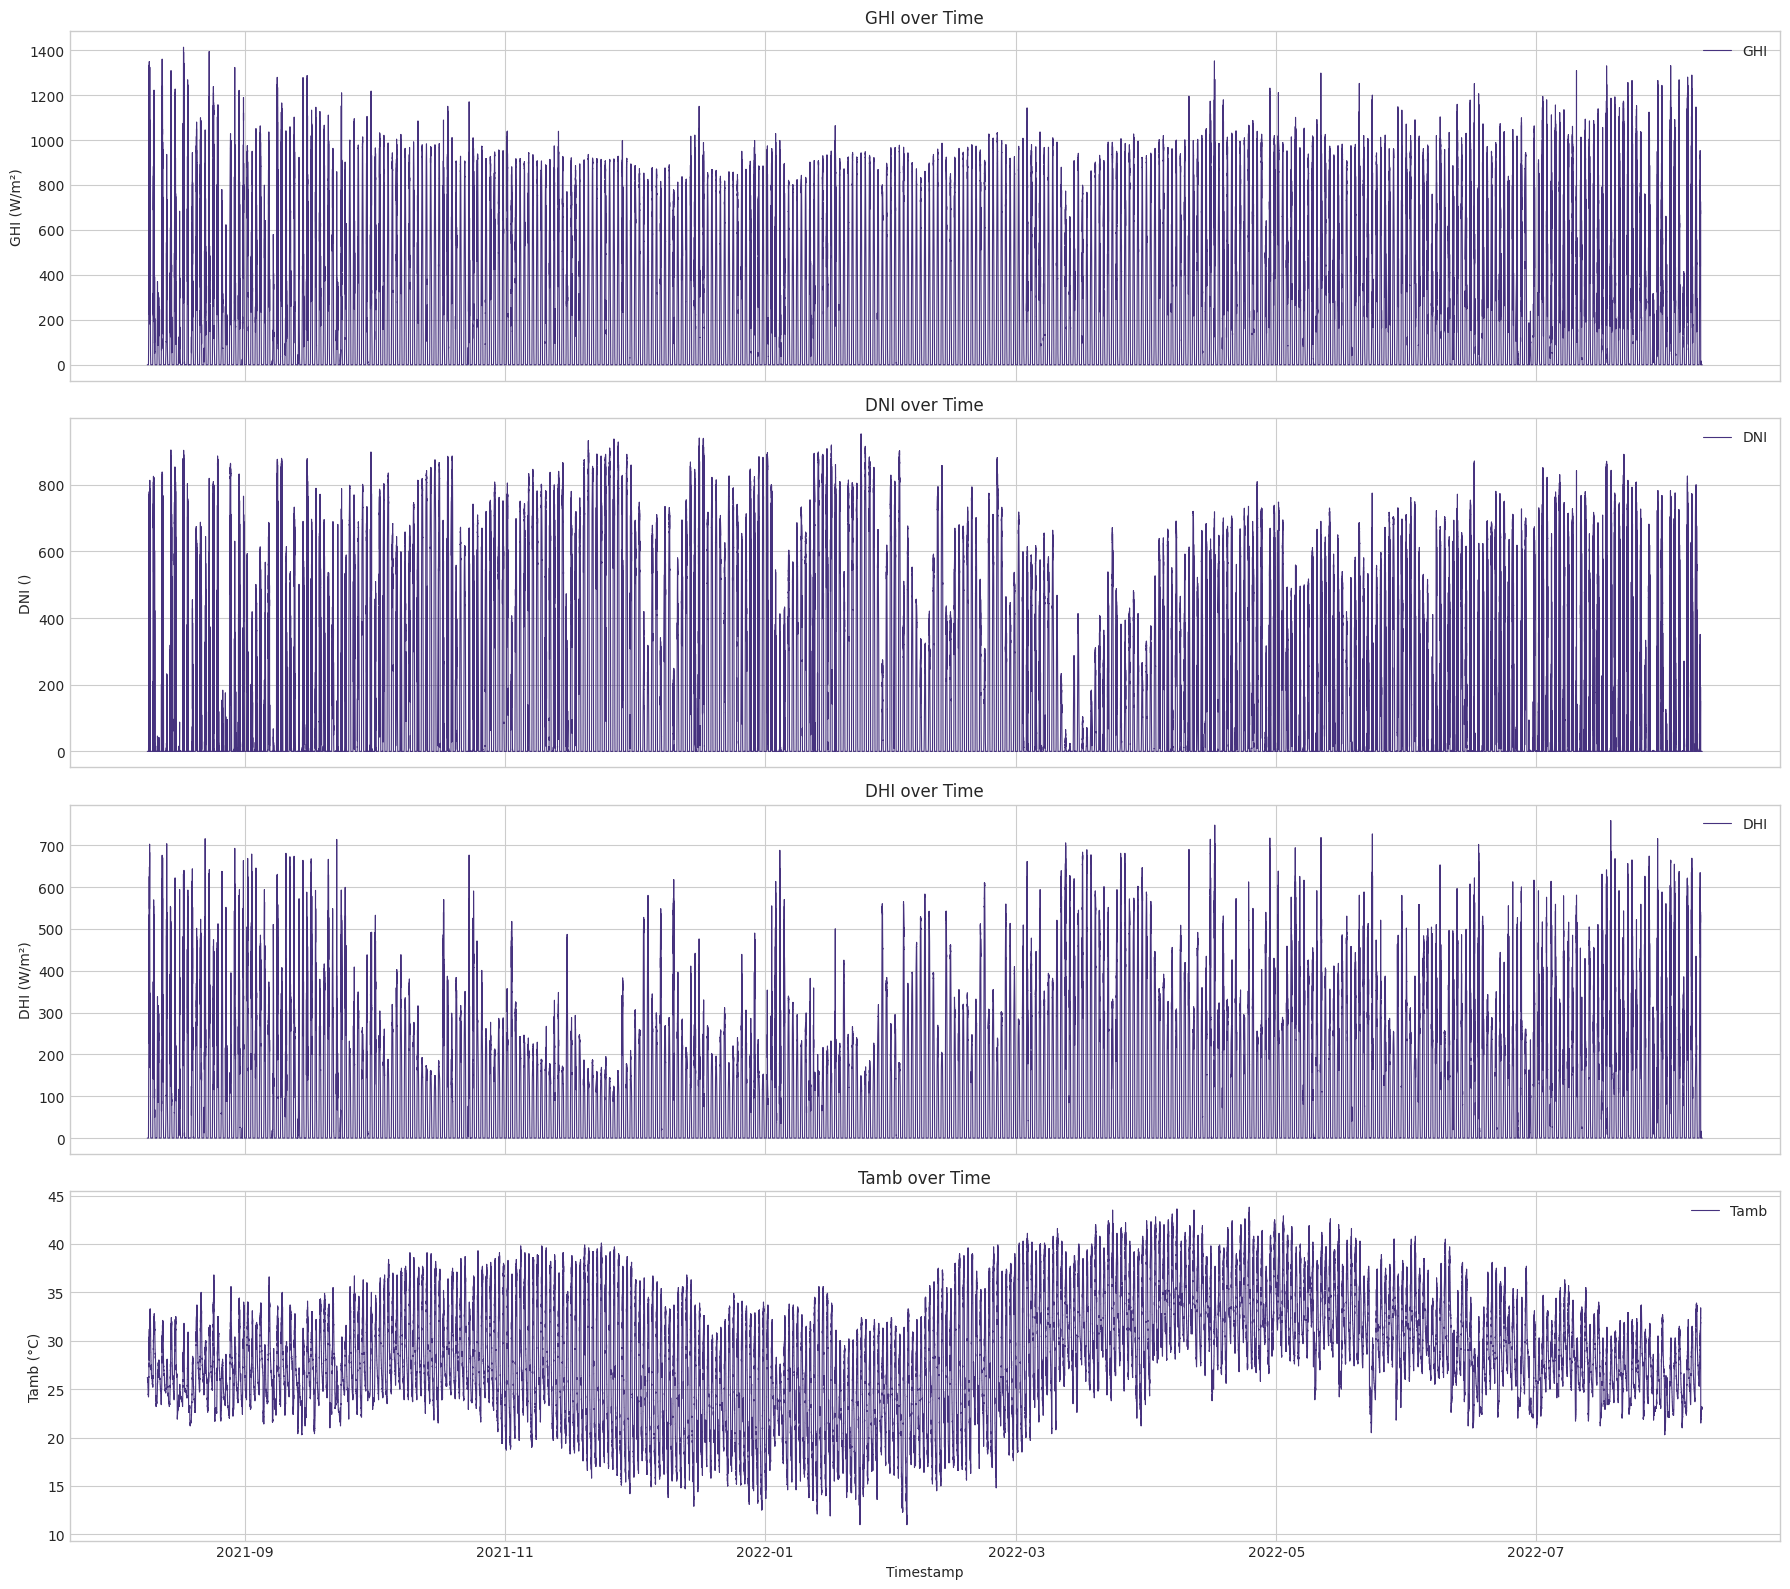


--- Average GHI by Month ---


/tmp/ipykernel_70723/2504123825.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_ghi = df_plot['GHI'].resample('M').mean()


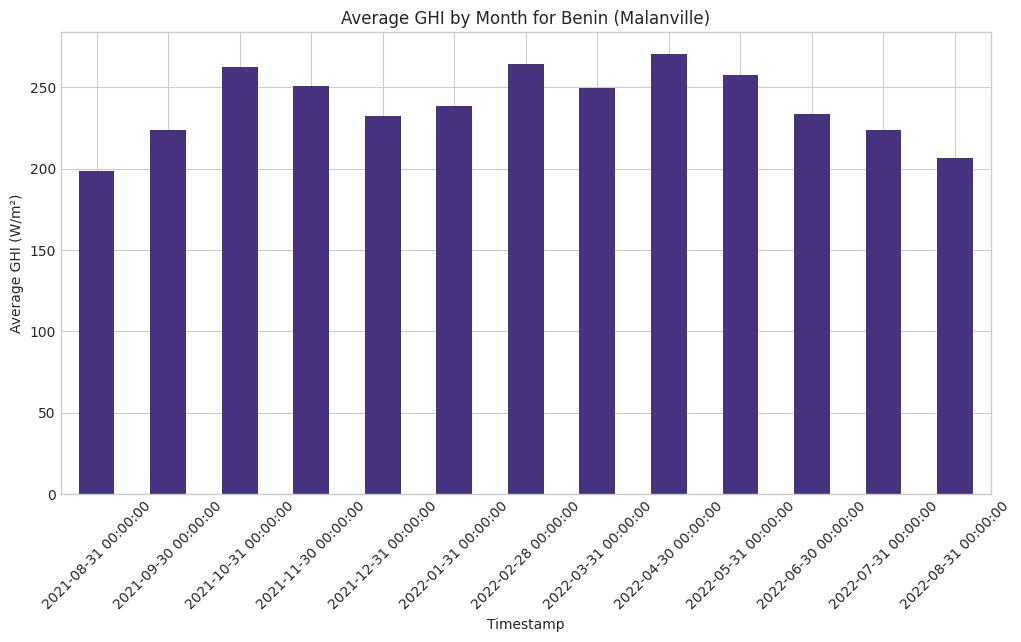


--- Average GHI by Hour of Day ---


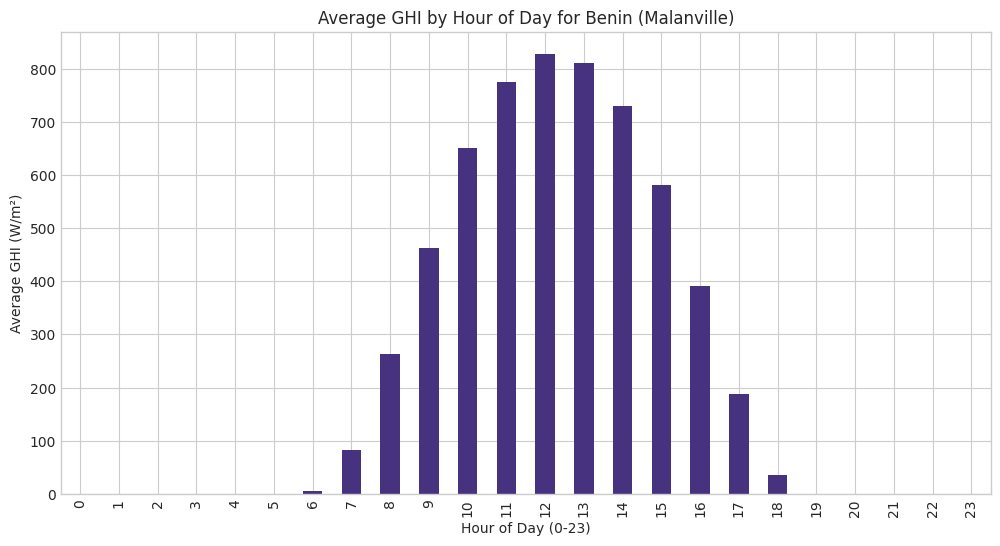

In [14]:
if df_plot is not None and isinstance(df_plot.index, pd.DatetimeIndex):
    print("--- Time Series Plots ---")
    cols_to_plot_ts = ['GHI', 'DNI', 'DHI', 'Tamb']
    
    # Check if columns exist before trying to plot
    valid_cols_ts = [col for col in cols_to_plot_ts if col in df_plot.columns]
    
    if valid_cols_ts:
        num_plots = len(valid_cols_ts)
        fig, axes = plt.subplots(num_plots, 1, figsize=(18, 4 * num_plots), sharex=True)
        if num_plots == 1: # Matplotlib returns a single Axes object if only one subplot
            axes = [axes]

        for i, col in enumerate(valid_cols_ts):
            sns.lineplot(data=df_plot, x=df_plot.index, y=col, ax=axes[i], label=col, errorbar=None, linewidth=0.8)
            axes[i].set_ylabel(f"{col} ({'W/m²' if 'HI' in col else '°C' if 'Tamb' in col else ''})")
            axes[i].set_title(f"{col} over Time")
            axes[i].legend()
        
        plt.xlabel("Timestamp")
        plt.tight_layout()
        plt.show()
    else:
        print(f"None of the specified columns for time series plotting ({cols_to_plot_ts}) are available.")

    # Observe patterns by month (if data spans multiple months) or day
    # GHI by Month
    if 'GHI' in df_plot.columns and df_plot.index.month.nunique() > 1:
        print("\n--- Average GHI by Month ---")
        # Resample to daily mean first to avoid issues with sub-daily data aggregation, then monthly.
        # Or directly resample if appropriate for the data frequency.
        monthly_avg_ghi = df_plot['GHI'].resample('M').mean()
        if not monthly_avg_ghi.empty:
            monthly_avg_ghi.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Month for Benin (Malanville)")
            plt.ylabel("Average GHI (W/m²)")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("Not enough data or GHI column missing to show monthly GHI average.")

    # GHI by Hour of Day
    if 'GHI' in df_plot.columns:
        print("\n--- Average GHI by Hour of Day ---")
        hourly_avg_ghi = df_plot.groupby(df_plot.index.hour)['GHI'].mean()
        if not hourly_avg_ghi.empty:
            hourly_avg_ghi.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Hour of Day for Benin (Malanville)")
            plt.xlabel("Hour of Day (0-23)")
            plt.ylabel("Average GHI (W/m²)")
            plt.show()
        else:
            print("Could not compute hourly GHI average (GHI column might be missing).")

else:
    print("Plotting DataFrame (df_plot) not available or Timestamp index not set correctly. Skipping Time Series Analysis.")


### 6.2. Cleaning Impact
Group by `Cleaning` flag and plot average ModA & ModB pre/post-clean.
Note: This is a simple average. A more detailed analysis would look at values immediately before and after a cleaning event.

--- Average Module Readings by Cleaning Status ---


ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165

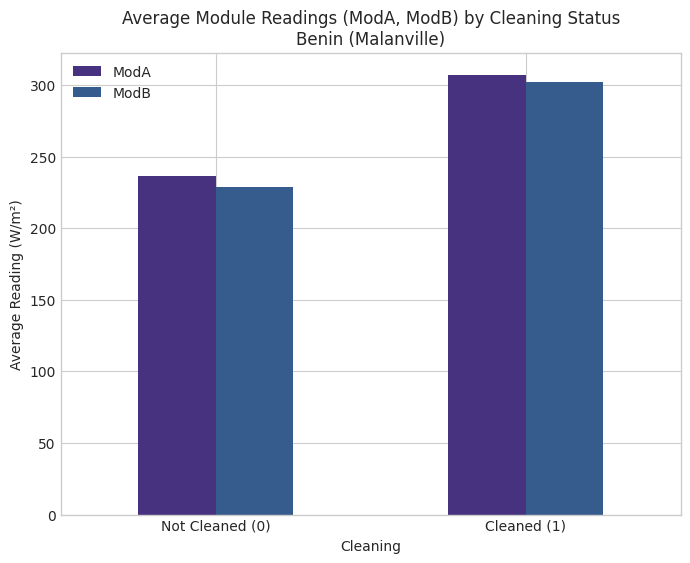

In [15]:
if df_plot is not None and 'Cleaning' in df_plot.columns and 'ModA' in df_plot.columns and 'ModB' in df_plot.columns:
    if df_plot['Cleaning'].nunique() > 1 and df_plot['Cleaning'].notna().all(): # Ensure there are both 0 and 1 values and no NaNs
        cleaning_impact = df_plot.groupby('Cleaning')[['ModA', 'ModB']].mean()
        print("--- Average Module Readings by Cleaning Status ---")
        display(cleaning_impact)

        if not cleaning_impact.empty:
            cleaning_impact.plot(kind='bar', figsize=(8, 6))
            plt.title("Average Module Readings (ModA, ModB) by Cleaning Status\nBenin (Malanville)")
            plt.ylabel("Average Reading (W/m²)")
            plt.xticks(ticks=[0, 1], labels=['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)
            plt.show()
        else:
            print("Could not compute cleaning impact, grouped data might be empty.")
    elif df_plot['Cleaning'].nunique() <=1:
         print(f"Not enough distinct 'Cleaning' events (0 and 1) to show impact. Unique values: {df_plot['Cleaning'].unique()}")
    else:
        print("'Cleaning' column might contain NaNs even after imputation attempts.")
else:
    print("df_plot, 'Cleaning', 'ModA', or 'ModB' column not available. Skipping Cleaning Impact analysis.")

#### 6.3.1. Correlation Heatmap
Heatmap of correlations (GHI, DNI, DHI, TModA, TModB, Tamb, RH, WS).

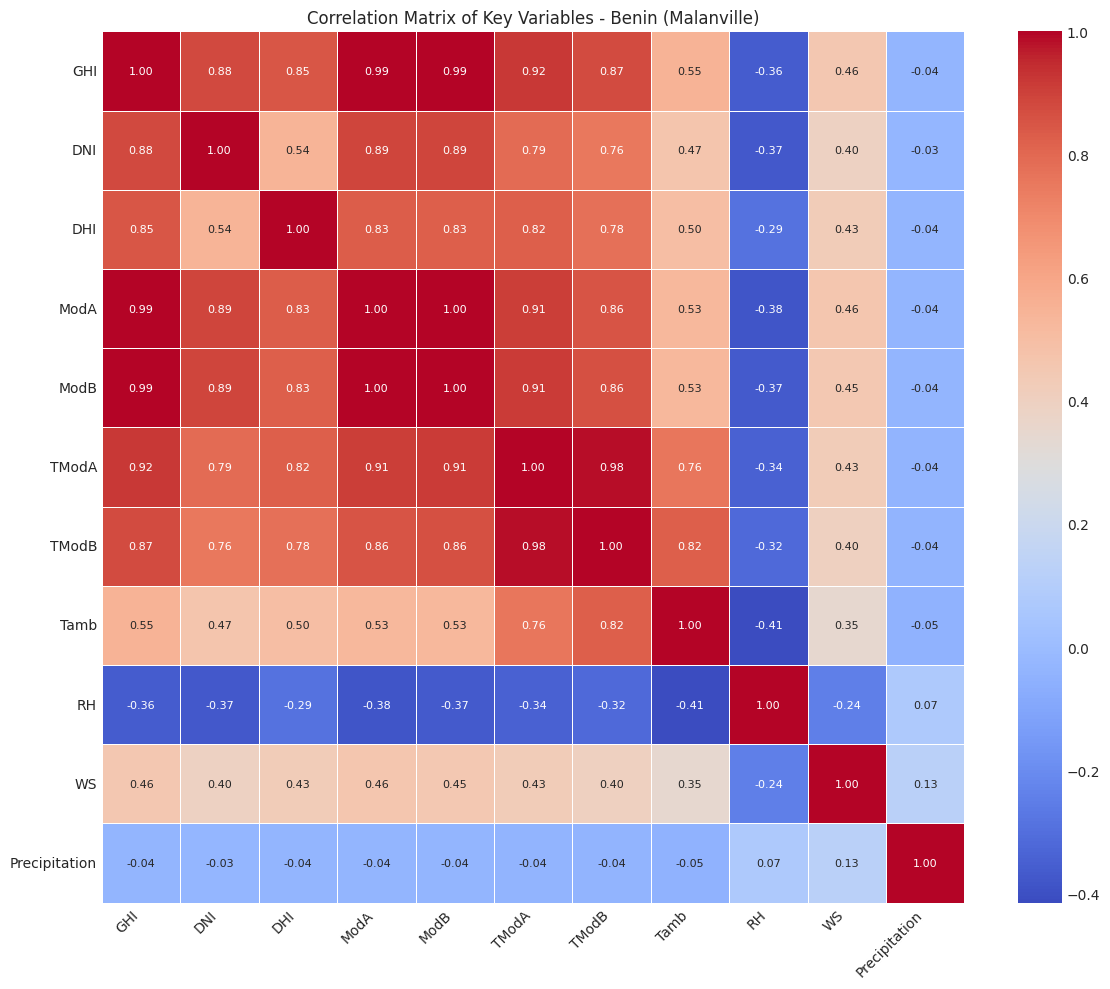

In [16]:
if df_plot is not None:
    correlation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'Precipitation']
    # Ensure all correlation_cols exist in df_plot and are numeric
    valid_correlation_cols = [col for col in correlation_cols 
                              if col in df_plot.columns and pd.api.types.is_numeric_dtype(df_plot[col])]

    if len(valid_correlation_cols) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = df_plot[valid_correlation_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title("Correlation Matrix of Key Variables - Benin (Malanville)")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough valid numeric columns for correlation matrix. Found: {valid_correlation_cols}")
else:
    print("df_plot not available. Skipping Correlation Heatmap.")

#### 6.3.2. Scatter Plots
Scatter plots: WS vs. GHI; RH vs. Tamb; RH vs. GHI. (Adding a few more for richer analysis)

--- Scatter Plots ---


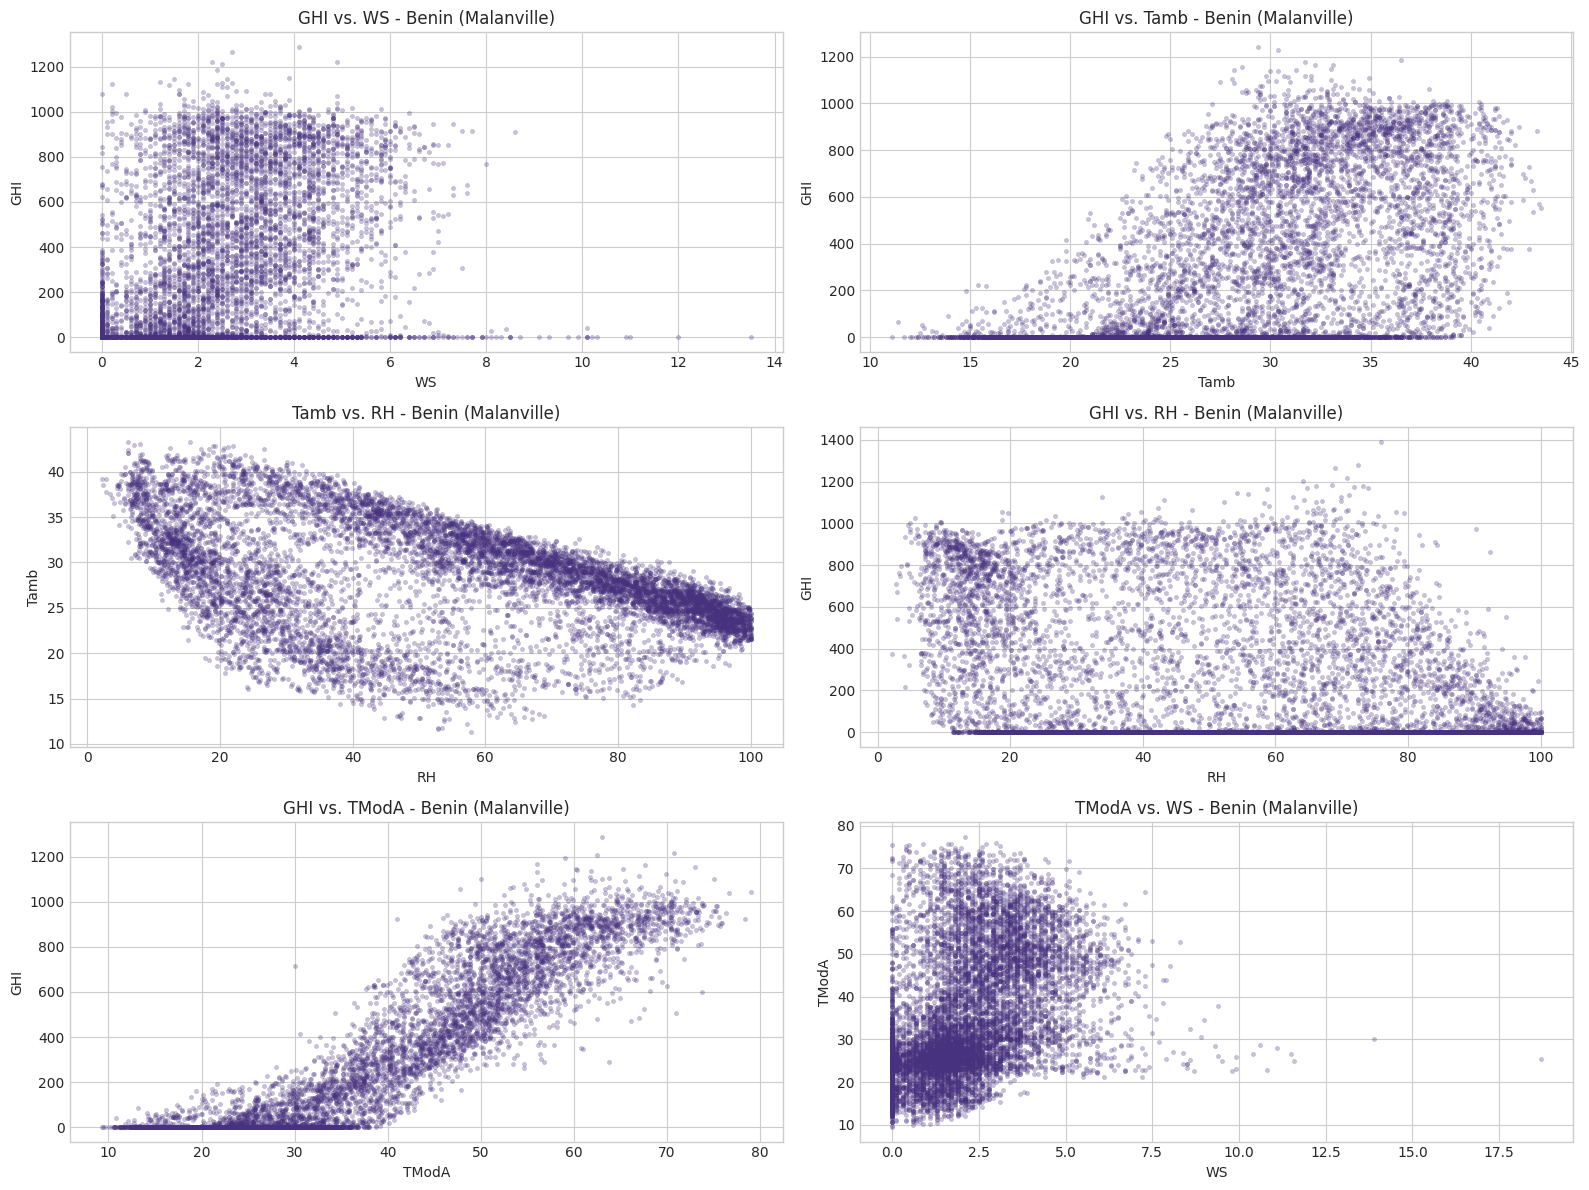

In [17]:
if df_plot is not None:
    print("--- Scatter Plots ---")
    scatter_pairs = [
        ('WS', 'GHI'), ('Tamb', 'GHI'),
        ('RH', 'Tamb'), ('RH', 'GHI'),
        ('TModA', 'GHI'), ('WS', 'TModA') # Wind speed effect on module temp
    ]
    
    # Check if columns exist
    valid_scatter_pairs = []
    for x_col, y_col in scatter_pairs:
        if x_col in df_plot.columns and y_col in df_plot.columns:
            valid_scatter_pairs.append((x_col,y_col))
        else:
            print(f"Skipping scatter plot: Columns for {x_col} vs {y_col} not fully available.")

    if valid_scatter_pairs:
        num_valid_plots = len(valid_scatter_pairs)
        fig, axes = plt.subplots(nrows=(num_valid_plots + 1) // 2, ncols=2, figsize=(16, 4 * ((num_valid_plots + 1) // 2)))
        axes = axes.flatten() # Flatten to 1D array for easy iteration

        for i, (x_col, y_col) in enumerate(valid_scatter_pairs):
            # Sample if data is too large for performance, e.g., 10000 random points
            sample_df = df_plot if len(df_plot) < 10000 else df_plot.sample(10000)
            sns.scatterplot(data=sample_df, x=x_col, y=y_col, ax=axes[i], alpha=0.3, s=10, edgecolor=None)
            axes[i].set_title(f"{y_col} vs. {x_col} - Benin (Malanville)")
        
        # Remove any empty subplots if the number of pairs is odd and num_valid_plots > 0
        if num_valid_plots % 2 != 0 and num_valid_plots > 0 :
            if num_valid_plots < len(axes): # Ensure we don't try to delete a non-existent axis
                 fig.delaxes(axes[num_valid_plots])
            
        plt.tight_layout()
        plt.show()
    else:
        print("No valid column pairs for scatter plots.")
else:
    print("df_plot not available. Skipping Scatter Plots.")

### 6.4. Wind & Distribution Analysis

#### 6.4.1. Wind Rose (WS/WD)

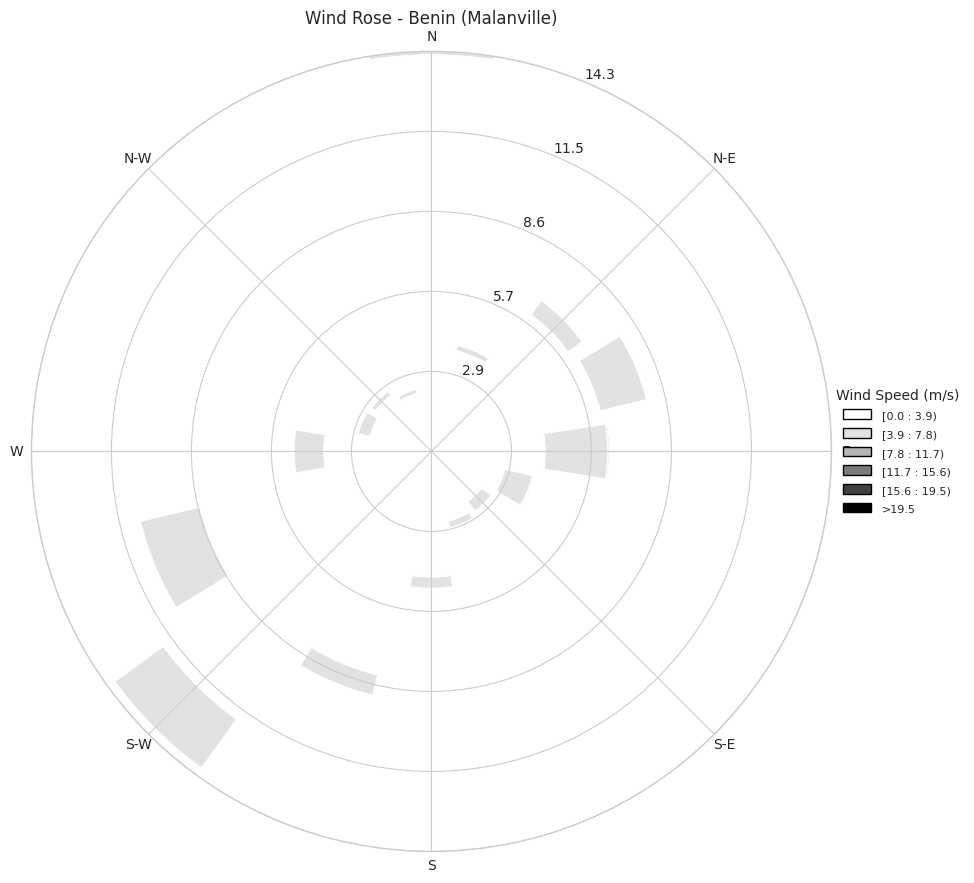

In [18]:
try:
    from windrose import WindroseAxes
except ImportError:
    print("Windrose library not installed. Skipping wind rose plot. Install with: pip install windrose")
    WindroseAxes = None

if df_plot is not None and WindroseAxes is not None:
    if 'WS' in df_plot.columns and 'WD' in df_plot.columns:
        # Drop NaNs specifically for windrose plot inputs
        ws_wd_data = df_plot[['WS', 'WD']].dropna()
        
        if not ws_wd_data.empty and len(ws_wd_data['WD'].unique()) > 1: # Need some variation in direction
            fig = plt.figure(figsize=(10, 10)) # Increased figure size
            ax = WindroseAxes.from_ax(fig=fig)
            ax.bar(ws_wd_data['WD'], ws_wd_data['WS'], normed=True, opening=0.8, edgecolor='white', nsector=16) # 16 sectors common
            ax.set_legend(title="Wind Speed (m/s)", loc='center left', bbox_to_anchor=(1, 0.5)) # Adjust legend
            plt.title("Wind Rose - Benin (Malanville)", pad=20) # Add padding to title
            plt.show()
        elif ws_wd_data.empty:
            print("No valid WS/WD data for wind rose plot after dropping NaNs.")
        else:
            print("Not enough variation in Wind Direction for a meaningful wind rose plot.")
    else:
        print("WS or WD column not found. Skipping wind rose plot.")
elif WindroseAxes is None and df_plot is not None:
    pass # Already printed library missing message
else:
    print("df_plot not available. Skipping Wind Rose.")

#### 6.4.2. Histograms
Histograms for GHI, Tamb, RH, and WS.

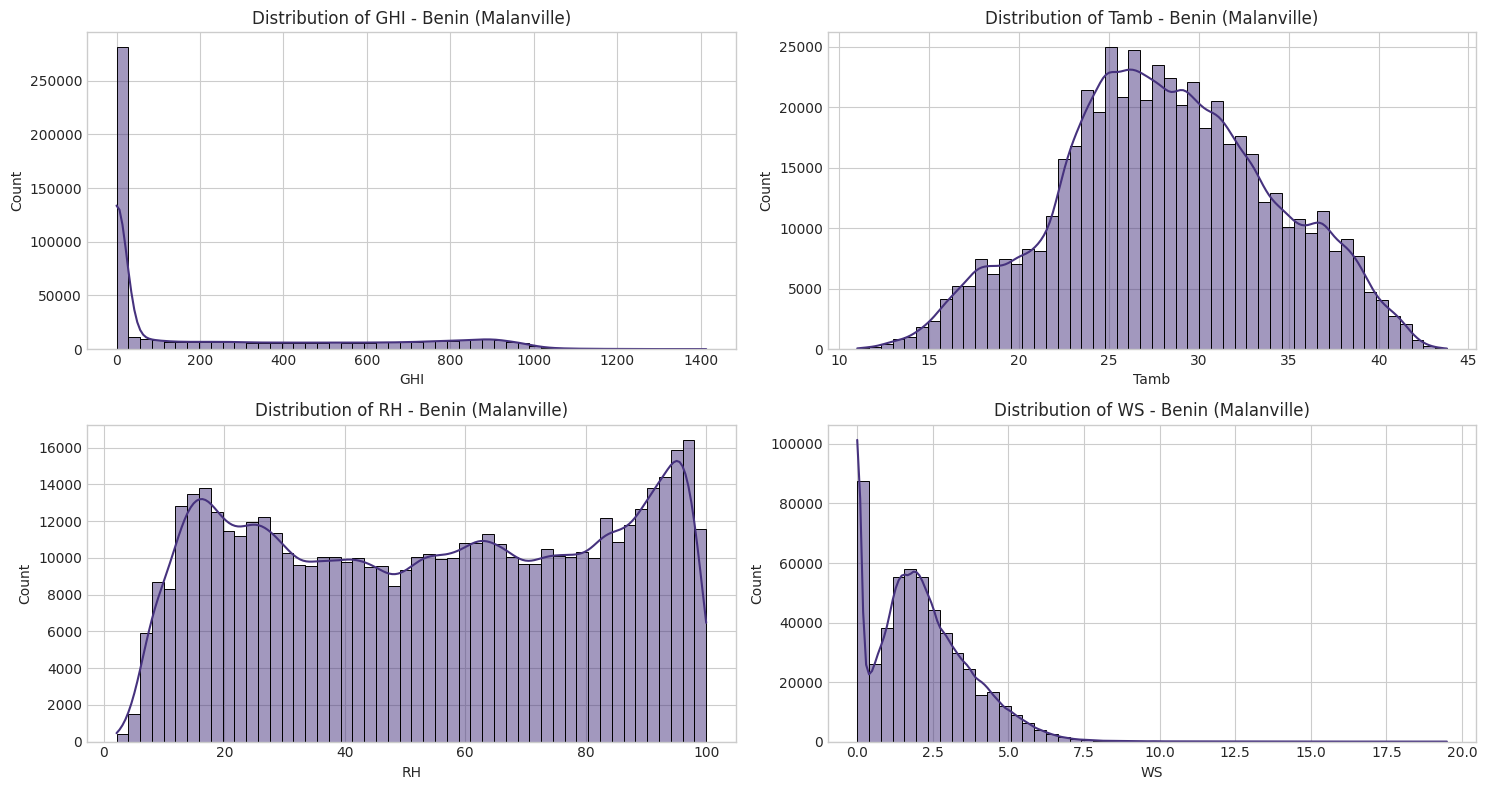

In [19]:
if df_plot is not None:
    hist_cols = ['GHI', 'Tamb', 'RH', 'WS']
    valid_hist_cols = [col for col in hist_cols if col in df_plot.columns]

    if valid_hist_cols:
        num_hist_plots = len(valid_hist_cols)
        fig, axes = plt.subplots( (num_hist_plots + 1)//2, 2, figsize=(15, 4 * ((num_hist_plots + 1)//2) ))
        axes = axes.flatten()

        for i, col in enumerate(valid_hist_cols):
            sns.histplot(df_plot[col], kde=True, ax=axes[i], bins=50) # Increased bins for more detail
            axes[i].set_title(f"Distribution of {col} - Benin (Malanville)")
        
        # Remove any empty subplots if the number of plots is odd
        if num_hist_plots % 2 != 0 and num_hist_plots > 0 :
             if num_hist_plots < len(axes):
                 fig.delaxes(axes[num_hist_plots])

        plt.tight_layout()
        plt.show()
    else:
        print("No valid columns for histograms.")
else:
    print("df_plot not available. Skipping Histograms.")


### 6.5. Temperature Analysis
 module temperature in relation to ambient temperature and irradiance.

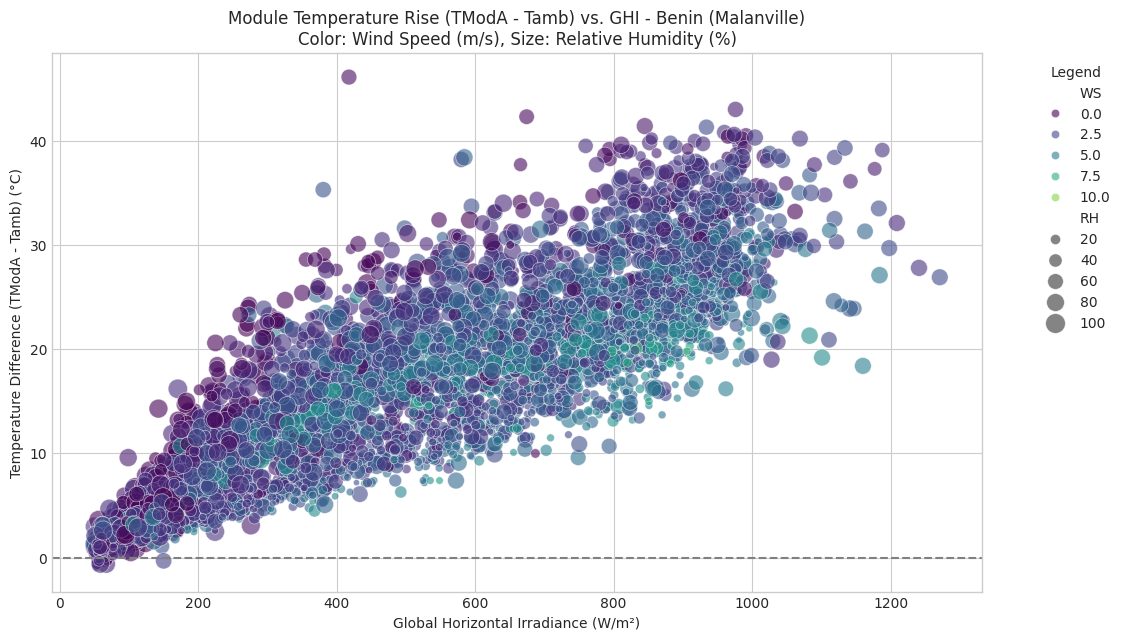

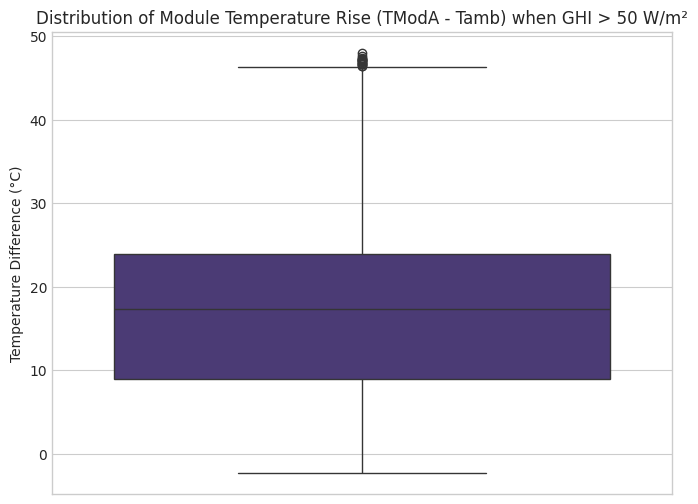


Descriptive statistics for TModA - Tamb (when GHI > 50 W/m²):


count    235380.000000
mean         16.930068
std           9.587781
min          -2.300000
25%           8.900000
50%          17.300000
75%          23.900000
max          48.000000
Name: T_Diff_ModA_Amb, dtype: float64

In [20]:
if df_plot is not None and 'TModA' in df_plot.columns and 'Tamb' in df_plot.columns and 'GHI' in df_plot.columns:
    # Calculate Temperature Difference: TModA - Tamb
    df_plot['T_Diff_ModA_Amb'] = df_plot['TModA'] - df_plot['Tamb']

    plt.figure(figsize=(12, 7))
    # Scatter plot of this difference vs. GHI
    # Sample if data is large
    sample_df_temp = df_plot if len(df_plot) < 10000 else df_plot.sample(10000)
    
    # Only plot for GHI > 50 W/m² to see effect during irradiance
    sns.scatterplot(data=sample_df_temp[sample_df_temp['GHI'] > 50], 
                    x='GHI', 
                    y='T_Diff_ModA_Amb', 
                    hue='WS', # Color by wind speed to see cooling effect
                    size='RH', # Size by RH
                    sizes=(20,200),
                    palette='viridis', alpha=0.6)
    plt.title('Module Temperature Rise (TModA - Tamb) vs. GHI - Benin (Malanville)\nColor: Wind Speed (m/s), Size: Relative Humidity (%)')
    plt.xlabel('Global Horizontal Irradiance (W/m²)')
    plt.ylabel('Temperature Difference (TModA - Tamb) (°C)')
    plt.axhline(0, color='grey', linestyle='--')
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Boxplot of T_Diff_ModA_Amb
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df_plot[df_plot['GHI'] > 50]['T_Diff_ModA_Amb']) # Only when there's sun
    plt.title('Distribution of Module Temperature Rise (TModA - Tamb) when GHI > 50 W/m²')
    plt.ylabel('Temperature Difference (°C)')
    plt.show()
    
    print("\nDescriptive statistics for TModA - Tamb (when GHI > 50 W/m²):")
    display(df_plot[df_plot['GHI'] > 50]['T_Diff_ModA_Amb'].describe())

else:
    print("TModA, Tamb, or GHI column not available for detailed temperature analysis.")

### 6.6. Bubble Chart
GHI vs. Tamb with bubble size = RH and color = BP (Barometric Pressure).

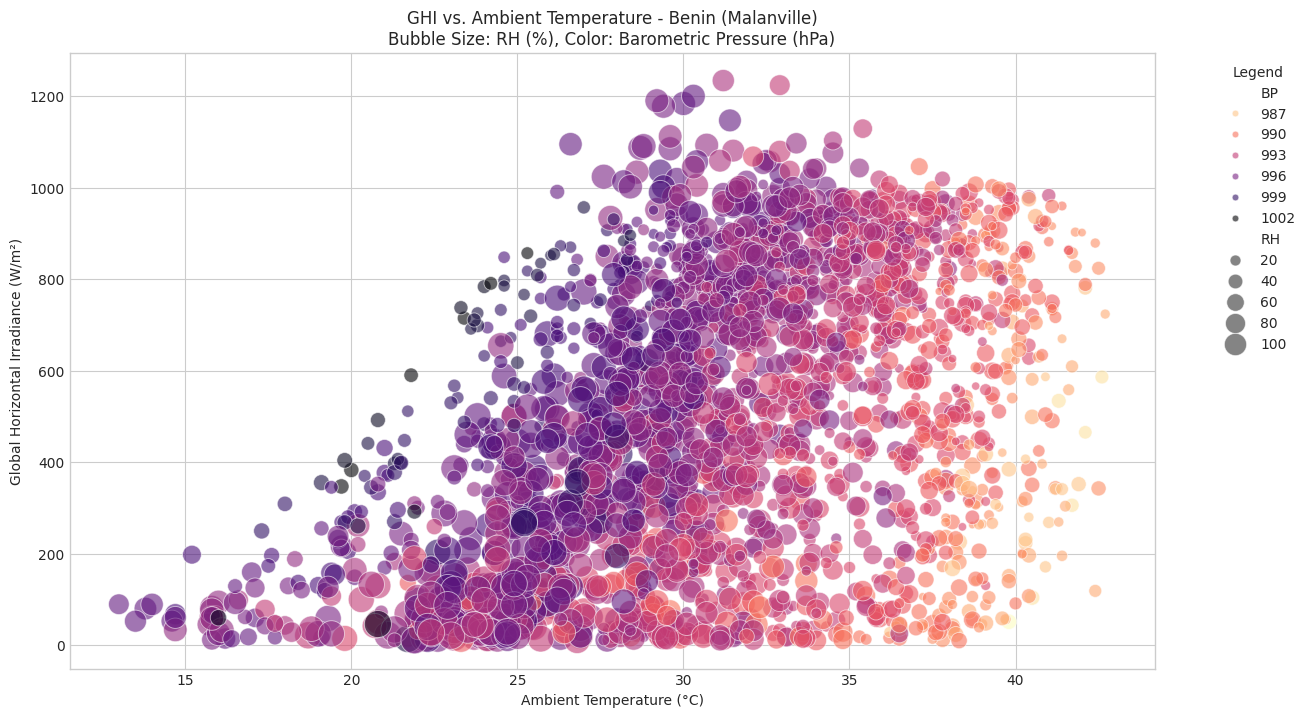

In [21]:
if df_plot is not None:
    bubble_chart_cols = ['GHI', 'Tamb', 'RH', 'BP']
    if all(col in df_plot.columns for col in bubble_chart_cols):
        plt.figure(figsize=(14, 8))
        # Sample if data is too large for performance
        sample_df_bubble = df_plot if len(df_plot) < 5000 else df_plot.sample(5000)
        
        sns.scatterplot(data=sample_df_bubble[sample_df_bubble['GHI'] > 10], # Focus on daytime
                        x='Tamb', 
                        y='GHI', 
                        size='RH',  # Bubble size by Relative Humidity
                        hue='BP',   # Color by Barometric Pressure
                        sizes=(30, 400), # Min and max bubble sizes
                        alpha=0.6, 
                        palette="magma_r") # A different palette
        plt.title("GHI vs. Ambient Temperature - Benin (Malanville)\nBubble Size: RH (%), Color: Barometric Pressure (hPa)")
        plt.xlabel("Ambient Temperature (°C)")
        plt.ylabel("Global Horizontal Irradiance (W/m²)")
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.8)
        plt.grid(True)
        plt.show()
    else:
        missing_bubble_cols = [col for col in bubble_chart_cols if col not in df_plot.columns]
        print(f"One or more columns ({missing_bubble_cols}) not found for bubble chart.")
else:
    print("df_plot not available. Skipping Bubble Chart.")


In [22]:
print("Benin (Malanville) EDA notebook execution complete.")

Benin (Malanville) EDA notebook execution complete.
